This code is designed to take quantative behavioral data over a timecourse,
taking filename as a long data format (.xlsx or .csv) 
columns:
    'mouse_id' , 'group_id' , 'behavior_time'

and an XXX_input_dict.py file with treatment_mapping and experimental_info

1. Plot a single time point with stats using singleHistogram()

2. Plot all timepoints for a single behavior using behaviorHistogram()




In [2]:
from main import *

filename = 'TCB2_data_HT.csv'

%run tcb2_input_dict.py


treatment_mapping SAVED TO /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT SUBCACHE
experimental_info SAVED TO /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT SUBCACHE


In [3]:
# FETCH DF

subselectDf(getRawDf(filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE


,mouse_id,group_id,HT_20,HT_30,HT_40,HT_50,treatment,color,experiment
10,23,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
11,24,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
18,31,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
22,36,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
24,38,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
26,40,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
29,44,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
35,50,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
36,51,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist
42,57,5,0,0,0,0,0.2mg/kgMDL,grey,agonist_antagonist


RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  28.108037  5.636770e-09

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB    2.8000  0.0003  1.1886  4.4114    True
1  0.3mg/kgTCB   3mg/kgTCB    4.1182  0.0000  2.6338  5.6025    True
2  0.3mg/kgTCB    vehicles   -0.5333  0.8421 -2.2876  1.2210   False
3   10mg/kgTCB   3mg/kgTCB    1.3182  0.1281 -0.2604  2.8967   False
4   10mg/kgTCB    vehicles   -3.3333  0.0001 -5.1680 -1.4986    True
5    3mg/kgTCB    vehicles   -4.6515  0.0000 -6.3757 -2.9274    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HT" CACHE
CACHED /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02


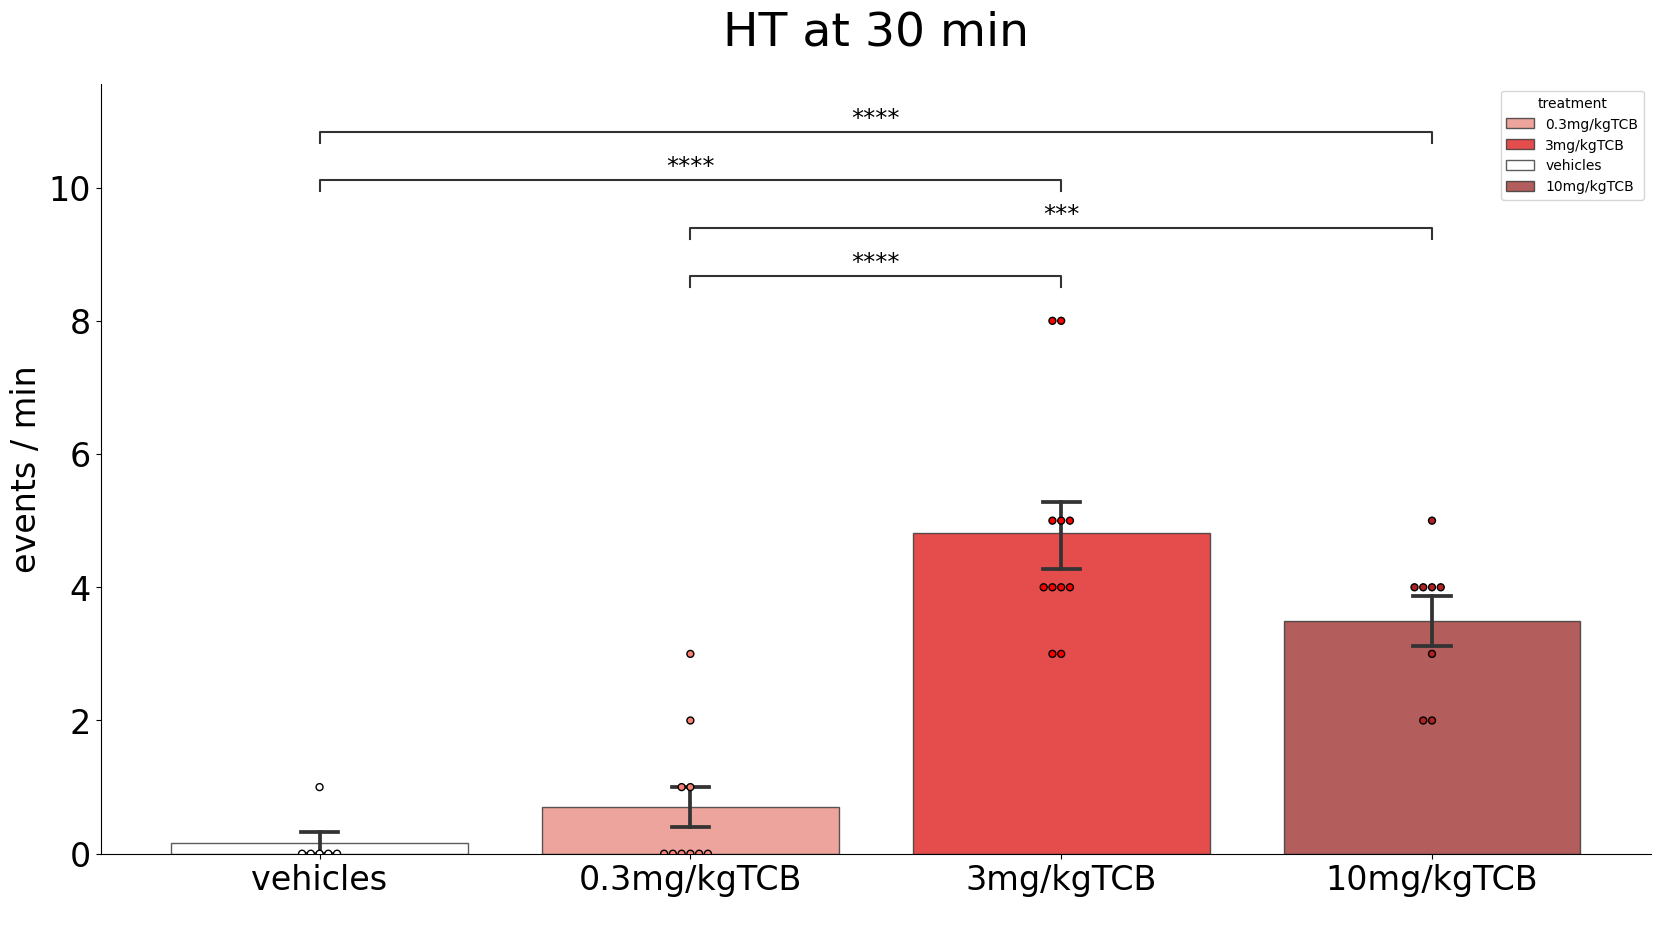

SAVED /Users/jasminebutler/Desktop/phd_behavior/output/head_twitch_histogram_dose_response_for_HT_30.svg
SAVED /Users/jasminebutler/Desktop/phd_behavior/output/head_twitch_histogram_dose_response_for_HT_30.png


In [5]:
#BEHQVIOR HISTOGRAMS

singleHistogram(
    filename,
    experiment='dose_response',
    vairable='HT_30',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)


In [ ]:
# BEHAVIORAL HISTOGRAM

behaviorHistogram( filename, 
                  experiment = 'dose_response', 
                  behavior = 'HT', 
                  p_value_threshold = 0.05 
                  )


In [ ]:
#TODO add plsd to posth hoc not hard code tukeys
#add outlier detection
# change stats system removing compound and regions and adding x-ticks or tims as that is what it is in this behavioral context 